In [1]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.io.shapereader as shpreader


import matplotlib.backends.backend_pdf as pdf
import matplotlib.font_manager as mfm
import matplotlib.patches as patches

import json
import numpy as np

In [2]:
# more setup
cm = 1/2.54
a4_landscape = (29.7*cm,21*cm)
a4_portrait = (21*cm,29.7*cm)
a5_landscape = (21*cm,14.8*cm)
a5_portrait = (14.8*cm,21*cm)

iceland_extent = (-25.356,-11.997,62.472,67.458)
capital_region_extent = (-22.769,-21.110, 63.729, 64.373)

fname = '/Users/odinndagur/Downloads/gadm36_ISL_shp/gadm36_ISL_2.shp'

In [3]:
# ignore unimportant warning that comes up
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
# clean data and make a dataframe
with open('pools.json','r') as f:
    data = json.load(f)

for pool in data:
    pool['address'] = pool['address'].strip()
    if(len(pool['coordinates']) > 0):
        pool['latitude'], pool['longitude'] = float(pool['coordinates'].split(',')[0]), float('-' + pool['coordinates'].split(',')[1])

dataframe = pd.DataFrame(data=data)

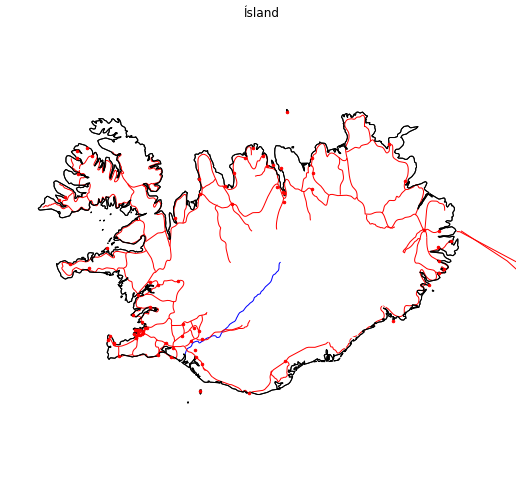

In [42]:
region_extent = iceland_extent
size=a4_landscape
plt.rcParams['svg.fonttype'] = 'none'

fig = plt.figure(figsize=(size))
fig.set_gid('Figure rammi')

ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(capital_region_extent, crs=ccrs.PlateCarree())
ax.set_title('Ísland',gid='Ísland')
ax.set_gid('Ax rammi')

# drop points from df if out of range of region_extent
df = dataframe
df = df.drop(df[(df.longitude < region_extent[0]) | (df.longitude > region_extent[1]) | (df.latitude < region_extent[2]) | (df.latitude > region_extent[3])].index)

coast = cfeature.NaturalEarthFeature(category='physical', scale='10m', facecolor='none', name='coastline', edgecolor='black', gid='lolcoast')
land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='black', facecolor='none',gid='land')# facecolor=cfeature.COLORS['land'])
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor='blue',facecolor='none',gid='rivers')
glaciers = cfeature.NaturalEarthFeature(category='physical', name='glaciated_areas', scale='10m', edgecolor='white',facecolor='none',gid='glaciers')
roads = cfeature.NaturalEarthFeature('cultural', 'roads', '10m',edgecolor='red',facecolor='none',gid='roads')

rivers = ax.add_feature(rivers)
roads = ax.add_feature(roads)
# ocean = ax.add_feature(cartopy.feature.OCEAN,edgecolor='blue',facecolor='none', gid='ocean')
land = ax.add_feature(land)
glaciers = ax.add_feature(glaciers)
coast = ax.add_feature(coast)

ax.add_wms(wms='http://gis.lmi.is/geoserver/wms',layers=)


# plot swimming pools as red dots
pools = plt.plot(df['longitude'],df['latitude'],'.', color='red', markersize=5, transform=ccrs.Geodetic(),gid='pools')
for pool_point, pool_data in zip(pools,df.values):
    pool_point.set_gid(pool_data[0])

# #pool names
# transform = ccrs.Mercator()._as_mpl_transform(ax)
# for index, obj in df.iterrows():
#     if(obj['latitude'] > 0):
#         from matplotlib.text import Text
#         txt = Text(text=obj['name'],x=obj['longitude'],y=obj['latitude'],color='black',size=5,ha='center',va='center',transform=ccrs.PlateCarree(),gid=obj['name'])
#         ax._add_text(txt)
#         # ax.text(obj['longitude'],obj['latitude'], obj['name'], color='black', size=5, ha='center', va='center', transform=ccrs.PlateCarree(),gid=obj['name'])#, 

# pools = ax.add_container(name='pools',gid='pools')

# test i dag
# pools = plt.axes(gid='pools')
# for pool in df.values:
#     pools.plot(pool[-2],pool[-1],'.',color='red',markersize=5,transform=ccrs.Geodetic(),gid=pool[0])

# fig.properties()['children'][-1].get_children()[-1].set_gid('clip2??')
# fig.properties()['children'][0].set_gid('clip???')
fig.properties()['children'][0].set_clip_on(False)
fig.properties()['children'][0].set_visible(False)
fig.properties()['children'][0].set_fill('None')


ax.set_axis_off()
plt.savefig('figma-island-lol.svg')
plt.show()